<a href="https://colab.research.google.com/github/Rudrajit12/EDA_Capstone_Project/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

## **1. Load the dataset and understand the variables present in the dataset**

In [1]:
# Loading and importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [22]:
# Loading the data
bnb_df = pd.read_csv('/content/drive/MyDrive/AlmaBetter Data Science/Module 1/EDA Project/Airbnb NYC 2019.csv')
bnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [23]:
bnb_df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


## **Data Summary:**


* **id**: An unique id for the airbnb listing (numeric)
* **name**: Name of the airbnb listed property (categorical)
* **host_id**: An unique id for the host of the property (numeric)
* **host_name**: Name of the host of the property (categorical)
* **neighbourhood_group**: A group which consists of many neighbourhoods (categorical)
* **neighbourhood**: Nearby properties of the place (categorical)
* **latitude**: latitude coordinates
* **longitude**: longitude coordinates
* **room_type**: Type of a room in the listed property (categorical)
* **price**: Cost of stay (numeric)
* **minimum_nights**: Minimum number of nights a person has to pay for (numeric)
* **number_of_reviews**: Reviews given to the property and host (numeric)
* **last_review**: Last review given (datetime)
* **reviews_per_month**: Average reviews over a month (numeric)
* **calculated_host_listings_count**: How many listings a particular host has (numeric)
* **availability_365**: Availability of the property out of 365 days (numeric)


In [24]:
# check the data types of the variables
bnb_df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [25]:
bnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [26]:
# how many records present in the dataset?
len(bnb_df)

48895

## **2. Check for duplicates and missing values in the dataset**

In [27]:
# check for duplicates present in the dataset
bnb_df.duplicated().sum()

0

In [28]:
# check for missing values present in the dataset
bnb_df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

We have 4 columns in which there are missing values present. The columns- name and last_review are irrelevant for our analysis and hence we can drop these columns.

## **3. Missing value treatment**

*   Drop the irrelevant columns
*   Replace NaN values with 0 for the column (reviews_per_month)





In [29]:
# drop the unnecessary columns from the dataframe
bnb_df.drop(['id','name','last_review'], axis=1, inplace=True)
bnb_df.head()

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [30]:
# replace all NaN values in 'reviews_per_month' by 0
bnb_df.reviews_per_month.fillna(0, inplace=True)
bnb_df.head()

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [32]:
# replace all NaN values in host_name by 'no name'
bnb_df.host_name.fillna('No Name', inplace=True)
bnb_df.head()

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [33]:
# check for any missing value
bnb_df.isnull().any()

host_id                           False
host_name                         False
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
reviews_per_month                 False
calculated_host_listings_count    False
availability_365                  False
dtype: bool

In [34]:
bnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   host_name                       48895 non-null  object 
 2   neighbourhood_group             48895 non-null  object 
 3   neighbourhood                   48895 non-null  object 
 4   latitude                        48895 non-null  float64
 5   longitude                       48895 non-null  float64
 6   room_type                       48895 non-null  object 
 7   price                           48895 non-null  int64  
 8   minimum_nights                  48895 non-null  int64  
 9   number_of_reviews               48895 non-null  int64  
 10  reviews_per_month               48895 non-null  float64
 11  calculated_host_listings_count  48895 non-null  int64  
 12  availability_365                

**Duplicates and missing values have been removed from the dataset. The dataset now is clean and ready for data exploration/analysis.**

In [35]:
# description of the clean dataset
bnb_df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


**We can see that there are few properties which have listed price as 0. This might be due to some error in data collection. We will exclude the price 0 for our analysis.**

In [36]:
# exclude the records which have price as zero
bnb_df = bnb_df.loc[bnb_df['price'] > 0]

In [37]:
# check the description
bnb_df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.888400e+04,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000
mean,6.762203e+07,40.728953,-73.952176,152.755053,7.029887,23.271991,1.090800,7.144628,112.779498
std,7.861666e+07,0.054532,0.046159,240.170260,20.512224,44.551331,1.597213,32.956185,131.627271
min,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.817310e+06,40.690100,-73.983080,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079257e+07,40.723080,-73.955685,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763120,-73.936290,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


**The price seems alright now. Though the maximum price is at 10000 $, we will consider it as a natural observation and not an outlier. There are few high values for minimum nights spent and as a reason the price might be higher for those stays.**

## **4. Data Exploration or Analysis**

*   The dataset is now ready to be explored.
*   We will uncover few insights from the dataset like:
    * Top 10 Hosts on the basis of count of listings
    * Top 10 Hosts on the basis of reviews
    * Top Neighbourhood Groups on the basis of count of properties
    * Top Neighbourhood Groups on the basis of mean price
    * Map of Neighbourhood Groups
    * Top Neighbourhood Groups on the basis of minimum nights spent
    * Which Neighbourhood Group has got the most reviews
    * Top Neighbourhood Groups on the basis of availability
    * Top 10 Neighbourhoods on the basis of count of properties
    * Top 10 Neighbourhoods on the basis of mean price
    



### **Which hosts has the most listings in Airbnb NYC?**

host_id    host_name        
219517861  Sonder (NYC)         327
107434423  Blueground           232
30283594   Kara                 121
137358866  Kazuya               103
12243051   Sonder                96
16098958   Jeremy & Laura        96
61391963   Corporate Housing     91
22541573   Ken                   87
200380610  Pranjal               65
7503643    Vida                  52
Name: host_id, dtype: int64


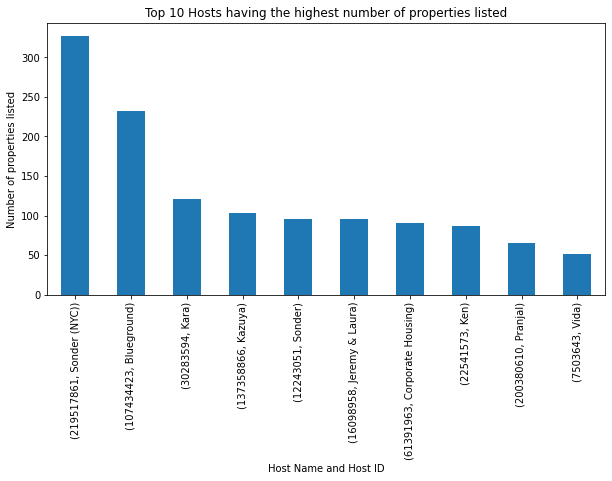

In [40]:
# top 10 hosts on the basis of count of listings
top_hosts_listings = bnb_df.groupby(['host_id','host_name'])['host_id'].count().sort_values(ascending=False)[:10]
print(top_hosts_listings)

# plot the top 10 hosts on the basis of count of listings
top_hosts_listings.plot.bar(figsize=(10,5))
plt.xlabel('Host Name and Host ID')
plt.ylabel('Number of properties listed')
plt.title('Top 10 Hosts having the highest number of properties listed')
plt.show()

**We can see from the above plot that Sonder (NYC) has the highest number of properties listed in Airbnb NYC. We will see later that whether his/her properties are the most preferred or not.**

### **Which hosts has got the most average reviews?**

host_id   host_name     
47621202  Dona              602.500000
4734398   Jj                599.333333
2369681   Carol             540.000000
12949460  Asa               488.000000
792159    Wanda             480.000000
37312959  Maya              454.600000
2321321   Lloyd             454.000000
277379    Agnes             448.500000
307962    Dennis & Naoko    441.000000
97086824  Miss Dy           434.000000
Name: number_of_reviews, dtype: float64


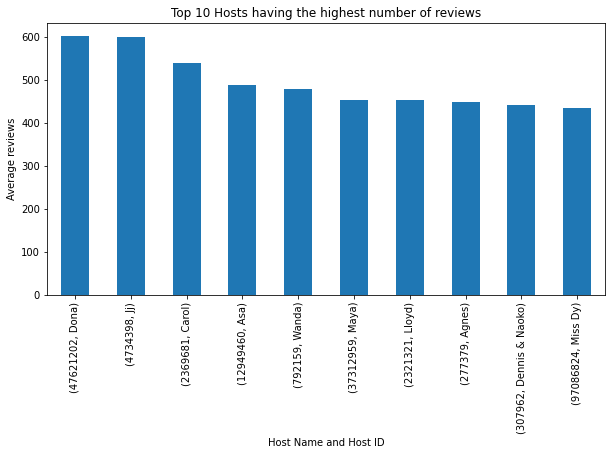

In [45]:
# top 10 hosts on the basis of reviews
top_hosts_reviews = bnb_df.groupby(['host_id','host_name'])['number_of_reviews'].mean().sort_values(ascending=False)[:10]
print(top_hosts_reviews)

# plot the top 10 hosts on the basis of reviews
top_hosts_reviews.plot.bar(figsize=(10,5))
plt.xlabel('Host Name and Host ID')
plt.ylabel('Average reviews')
plt.title('Top 10 Hosts having the highest number of reviews')
plt.show()

**From this plot, we can see clearly that Sonder (NYC) is nowhere among the top 10 hosts who has received the most reviews. Host Dona is clearly the winner here, who has got the most number of average reviews.**

### **Which neighbourhood group has the most number of properties listed?**

Manhattan        21660
Brooklyn         20095
Queens            5666
Bronx             1090
Staten Island      373
Name: neighbourhood_group, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


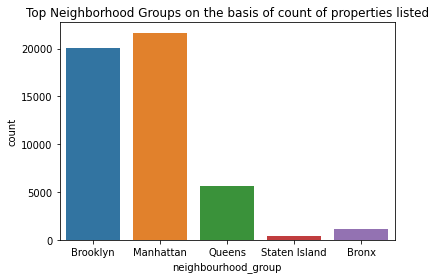

In [51]:
# top neighbourhood groups on the basis of count of properties
top_neighbourhood_groups = bnb_df['neighbourhood_group'].value_counts()
print(top_neighbourhood_groups)

# plot the top neighbourhood groups with the count of properties
plt.title('Top Neighborhood Groups on the basis of count of properties listed')
sns.countplot(bnb_df['neighbourhood_group'])
plt.show()

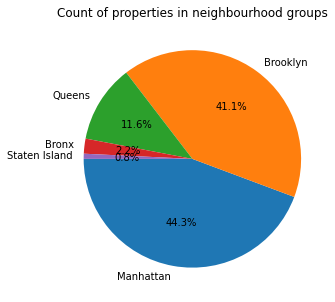

In [52]:
# visualizing the neighbourhood group through a pie chart
plt.figure(figsize=(10,5))
plt.title('Count of properties in neighbourhood groups')
plt.pie(bnb_df['neighbourhood_group'].value_counts(), labels=bnb_df['neighbourhood_group'].value_counts().index, autopct='%1.1f%%', startangle=180)
plt.show()

**We can see that Manhattan (21660) and Brooklyn (20095) Neighbourhood Group has the most properties listed according to the above plots.**